#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 06
**CH06A Comparing Online and Offline Prices: Testing the Difference**

billion-prices dataset dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from scipy import stats
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")


In [10]:
data = pd.read_csv("/workspaces/codespaces-jupyter/data/online_offline_ALL_clean.csv", encoding="latin1")
# data = pd.read_csv("https://osf.io/yhbr5/download", encoding="latin1")


In [3]:
#data=data[data["PRICETYPE"] == "Sale/Discounted Price"]
#data

In [4]:
data["PRICETYPE"].unique()

array([nan, 'Regular Price', 'Sale/Discounted Price'], dtype=object)

In [11]:
# FILTER DATA
# Keep only products (id) where all observations were added on the same day
data["same_day_ids"] = data.groupby("id")["date"].nunique()
same_day_ids = same_day_ids[same_day_ids == 1].index

#same_day_ids = data.groupby("id")["date"].nunique()
#same_day_ids = same_day_ids[same_day_ids == 1].index

data = data.loc[
    (data["id"].isin(same_day_ids)) &
    (data["COUNTRY"] == "BRAZIL") &
    (data["sale_online"].isnull()) &
    (data["price"].notna()) &
    (data["price_online"].notna())
]
data = data.sort_values(by="id", ascending=True)


AttributeError: 'Index' object has no attribute 'index'

In [8]:
data

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
9430,BRAZIL,14,BRAZIL_14,2015-05-21,21.0,5.0,2015.0,00110099000239,2.39,2.13,...,17:41,54410010,20150521_174143.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,-0.26
9255,BRAZIL,14,BRAZIL_14,2015-05-09,9.0,5.0,2015.0,00217521000999,9.99,10.69,...,21:46,14025-390,20150509_214652.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.70
9256,BRAZIL,14,BRAZIL_14,2015-05-09,9.0,5.0,2015.0,00357852000638,6.38,6.83,...,21:59,14025-390,20150509_215913.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.45
9343,BRAZIL,14,BRAZIL_14,2015-05-20,20.0,5.0,2015.0,00357968000599,5.99,5.98,...,14:55,54410010,20150520_145531.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,-0.01
9536,BRAZIL,14,BRAZIL_14,2015-06-06,6.0,6.0,2015.0,00642822,14.59,15.61,...,15:16,05417001,20150606_151626.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9453,BRAZIL,14,BRAZIL_14,2015-05-21,21.0,5.0,2015.0,A5178964000000455,4.55,5.34,...,17:14,54410010,20150521_171520.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.79
9428,BRAZIL,14,BRAZIL_14,2015-05-20,20.0,5.0,2015.0,A5191161000008990,89.90,49.90,...,14:41,54410010,20150520_144118.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,-40.00
9454,BRAZIL,14,BRAZIL_14,2015-05-21,21.0,5.0,2015.0,A5666102000000509,5.09,5.45,...,17:07,54410010,20150521_170724.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.36
9455,BRAZIL,14,BRAZIL_14,2015-05-21,21.0,5.0,2015.0,A5944590000001990,19.90,21.29,...,17:08,54410010,20150521_170842.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,1.39


In [7]:
# Drop obvious errors
#data = data.loc[data["price"] < 1000]


In [4]:
# Compare variables
data["diff"] = data["price_online"] - data["price"]
descr = data["diff"].describe()

In [59]:
descr

count    2031.000000
mean      -38.524613
std       127.311748
min     -1630.000000
25%       -29.100000
50%         0.000000
75%         0.000000
max      1799.000000
Name: diff, dtype: float64

In [60]:
data[data["diff"] > 0]

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
8252,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,3009,7.20,7.55,...,20:53,04363000,20160228_205345.jpg,3009,NaN,Sale/Discounted Price,768619.0,NaN,Brazil,0.35
8253,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,3011,7.50,7.99,...,20:53,04363000,20160228_205318.jpg,3011,NaN,Sale/Discounted Price,768619.0,NaN,Brazil,0.49
8256,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,3215,12.90,12.96,...,20:22,04363000,20160228_202231.jpg,3215,NaN,Regular Price,768619.0,NaN,Brazil,0.06
8262,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,3817,64.90,76.90,...,20:55,04363000,20160228_205535.jpg,3817,NaN,Sale/Discounted Price,768619.0,NaN,Brazil,12.00
8263,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,38203,48.09,50.10,...,20:13,04363000,20160228_201445.jpg,38203,NaN,Sale/Discounted Price,768619.0,NaN,Brazil,2.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,BRAZIL,15,BRAZIL_15,2015-09-01,1.0,9.0,2015.0,0528815697,25.90,29.90,...,19:41,12230000,20150901_194114.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,4.00
10130,BRAZIL,15,BRAZIL_15,2015-09-01,1.0,9.0,2015.0,0536204301,89.90,99.90,...,19:49,12230000,20150901_194932.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,10.00
10217,BRAZIL,15,BRAZIL_15,2015-09-12,12.0,9.0,2015.0,0535555002,49.90,59.90,...,11:44,80170120,20150912_114506.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,10.00
10225,BRAZIL,15,BRAZIL_15,2015-09-12,12.0,9.0,2015.0,0537643170,59.90,69.90,...,11:52,80170120,20150912_115320.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,10.00


In [61]:
data_min = data[data["diff"] == data["diff"].min()]
data_min

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
9180,BRAZIL,13,BRAZIL_13,2015-10-05,5.0,10.0,2015.0,124352200,1890.0,260.0,...,09:46,12230000,20151005_094645.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,-1630.0


In [9]:
# Show products with duplicate 'id' values (not unique products)
duplicate_products = data[data.duplicated(subset='id', keep=False)]
duplicate_products

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff


In [97]:
# Statistic with n observations (products) in the data:
# products count
# using pandas nunique for clarity:
# data["id"].nunique()
#well i was intitally foing analysis among unique products id.unique but realized authors of the textbook skipped this part and did across all samples - 6439
#which does not make sense to me

l=len(data["id"].unique())
l2=len(data)

# statistic mean(diff)

pdiff_mean=data["diff"].sum()/l #I think should be right
s=round(data["diff"].sum()/l2,2) #lol

s,l2

(np.float64(-38.52), 2031)

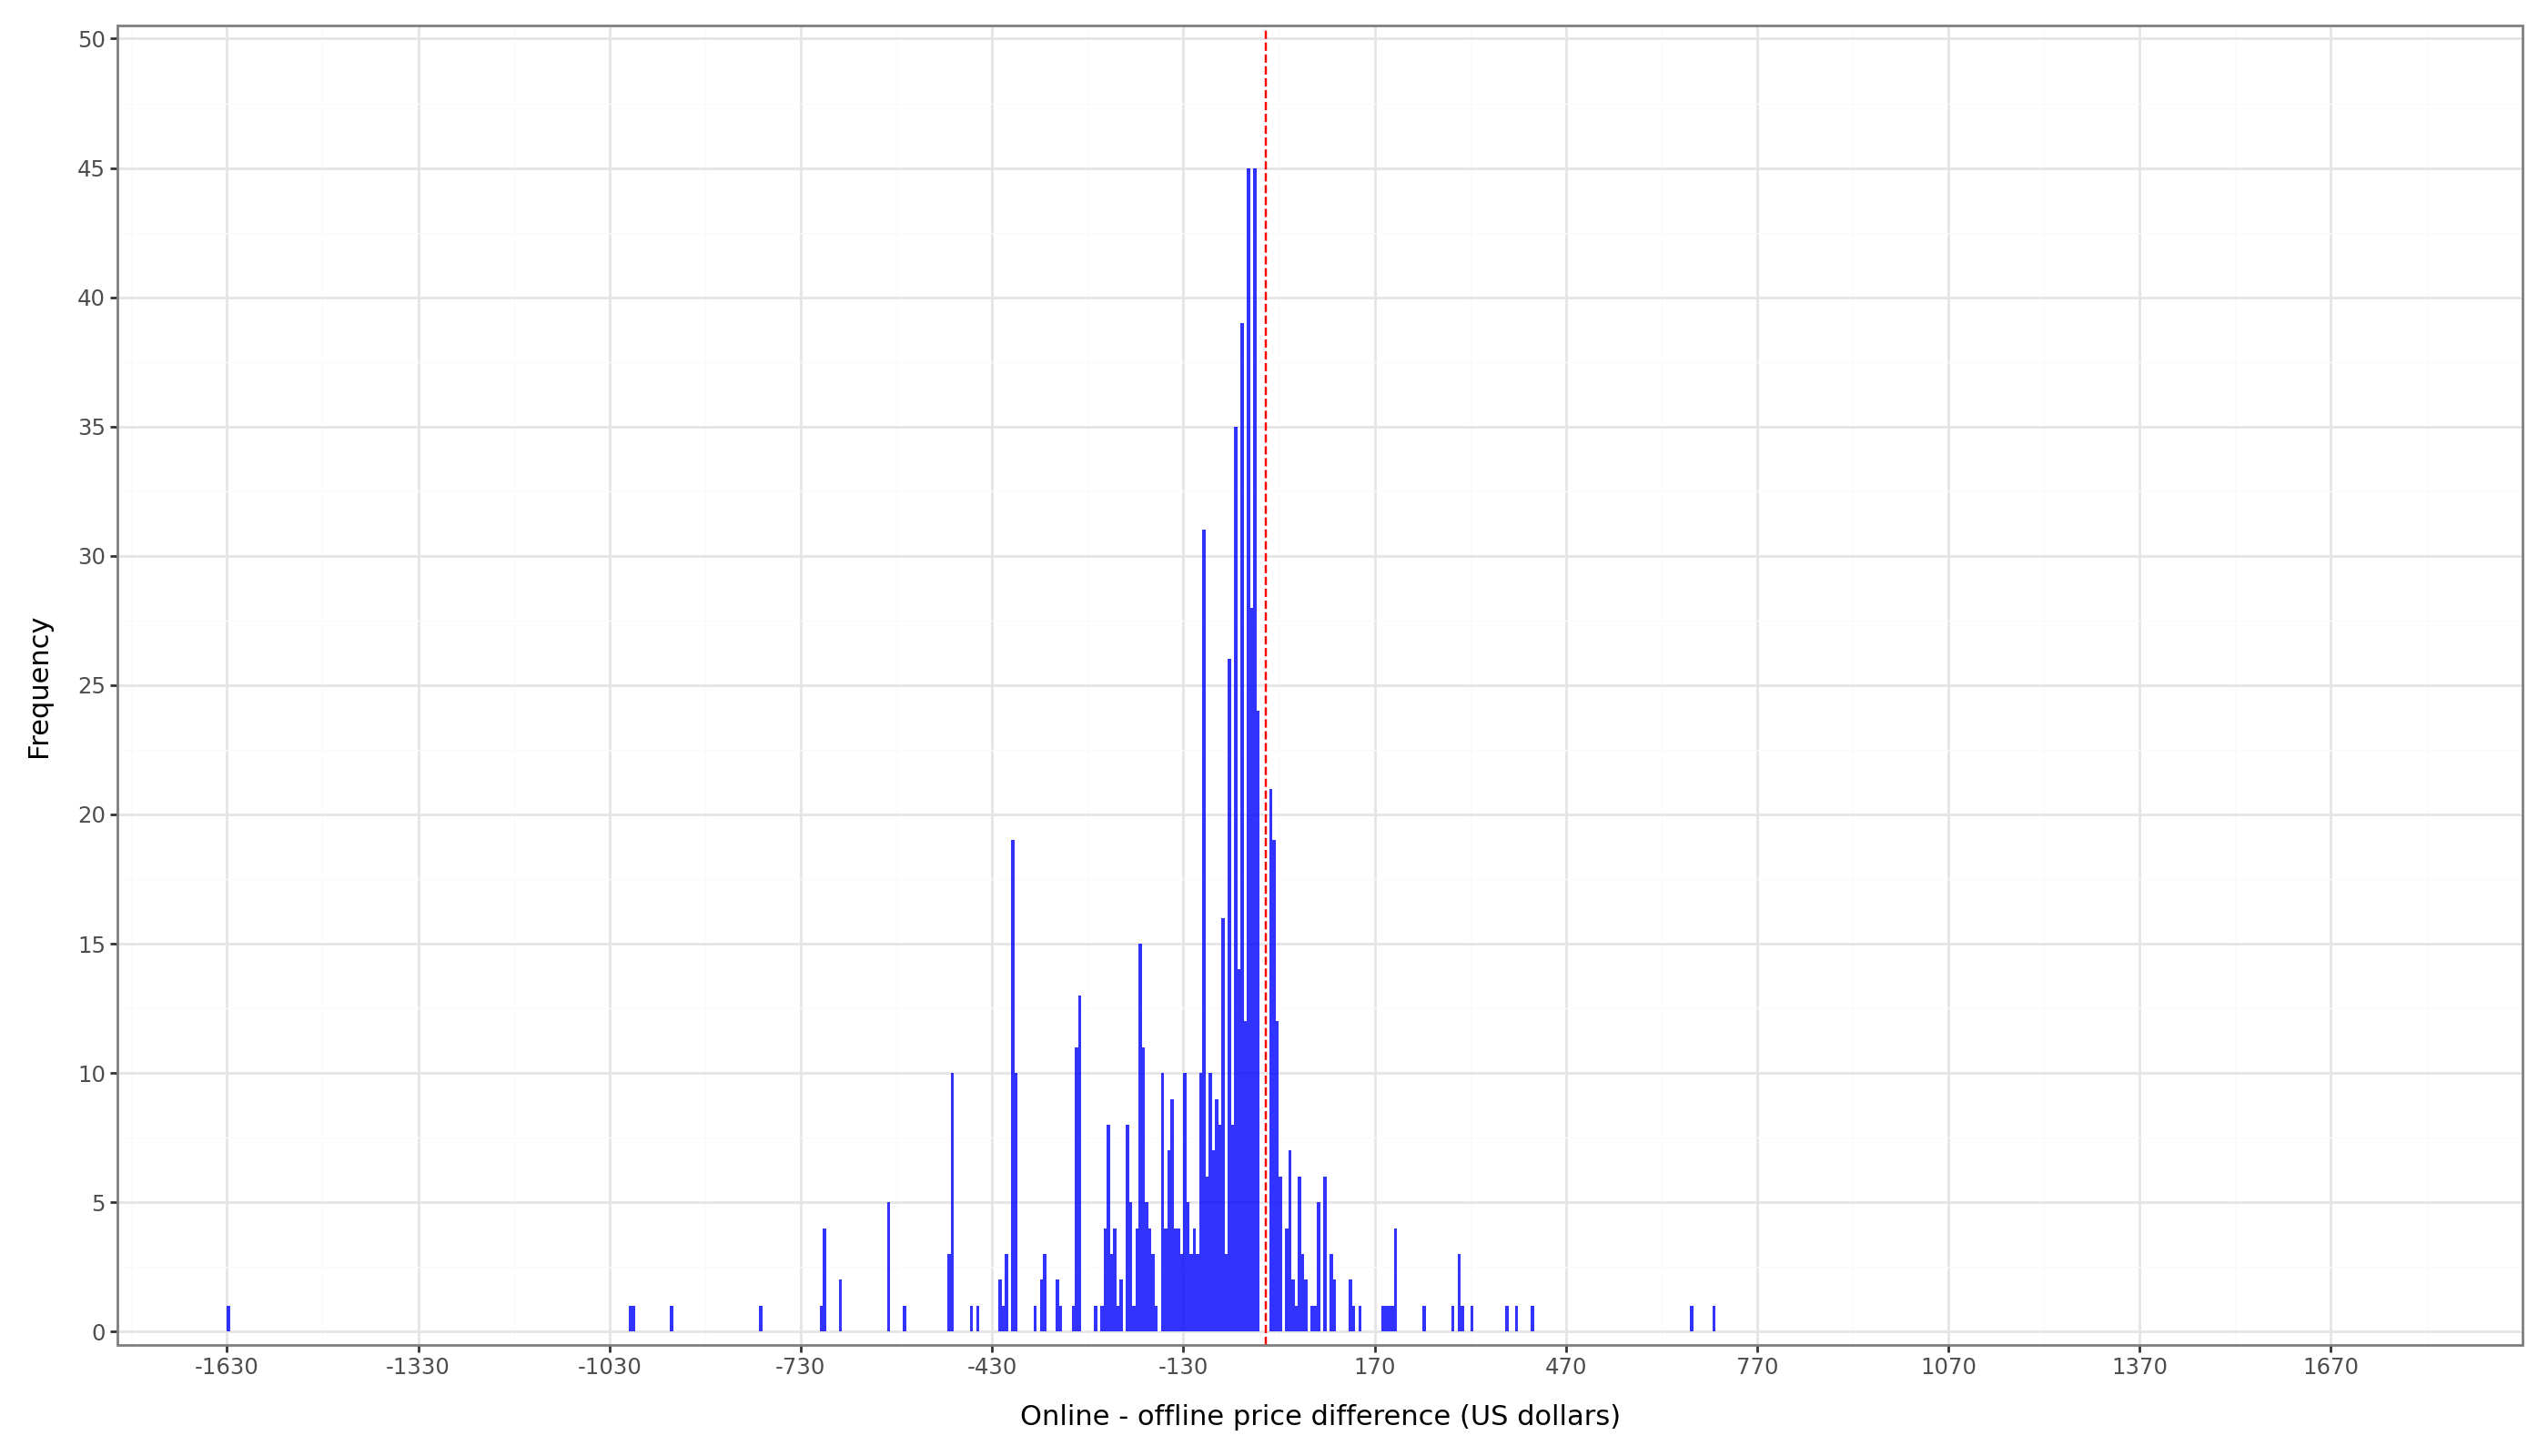

In [84]:
price_min = data["diff"].min()
price_max = data["diff"].max()
(
    ggplot(data, aes("diff"))
    + geom_histogram(
        binwidth=5,
        boundary=0,
        fill="blue",
        size=0.5,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
        closed="left",
    )
    + labs(x="Online - offline price difference (US dollars)", y="Frequency")
    + theme_bw()
    + scale_x_continuous(limits=(price_min, price_max), breaks=np.arange(price_min, price_max, 300))
    + scale_y_continuous(limits=(0, 50), breaks=np.arange(0, 100, 5), expand=(0.01, 0.01))
    + geom_segment(aes(x=300, y=500, xend=415, yend=20), arrow=arrow())
    + geom_segment(aes(x=-280, y=500, xend=-380, yend=20), arrow=arrow())
    + annotate("text", x=-300, y=700, label="min value= -380", size=11.5)
    + geom_vline(xintercept=0, linetype="dashed", color="red")  # Add 0 line to x axis
    + theme(figure_size=(14, 8))
)


In [85]:
# 4.99999 not 5 -- needed because of data imported from stata may be stored wierdly.
data1 = data.loc[abs(data["diff"]) < 4.999999]
data1["diff"].describe()


count    1205.000000
mean        0.176283
std         1.004899
min        -4.910000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.900000
Name: diff, dtype: float64

In [86]:
data1

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
8243,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,1056,11.95,11.95,...,20:26,04363000,20160228_202650.jpg,1056,NaN,Regular Price,768619.0,NaN,Brazil,0.0
8244,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,13460,23.42,23.42,...,20:43,04363000,20160228_204340.jpg,13460,NaN,Regular Price,768619.0,NaN,Brazil,0.0
8245,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,19892,13.90,13.90,...,20:36,04363000,20160228_203625.jpg,19892,NaN,Regular Price,768619.0,NaN,Brazil,0.0
8246,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,23556,10.34,10.34,...,21:14,04363000,20160228_211500.jpg,23556,NaN,Regular Price,768619.0,NaN,Brazil,0.0
8247,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,2765,57.89,57.89,...,21:06,04363000,20160228_210658.jpg,2765,NaN,Regular Price,768619.0,NaN,Brazil,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10314,BRAZIL,15,BRAZIL_15,2015-09-26,26.0,9.0,2015.0,0538158731,119.90,119.00,...,10:09,80170-120,20150926_100922.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,-0.9
10315,BRAZIL,15,BRAZIL_15,2015-09-26,26.0,9.0,2015.0,0538175195,19.90,19.90,...,09:38,80170-120,20150926_093953.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.0
10316,BRAZIL,15,BRAZIL_15,2015-09-26,26.0,9.0,2015.0,0538202827,29.90,29.90,...,10:29,80170-120,20150926_103009.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.0
10317,BRAZIL,15,BRAZIL_15,2015-09-26,26.0,9.0,2015.0,0538744212,29.90,29.90,...,10:06,80170-120,20150926_100630.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.0


In [87]:
data

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
8243,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,1056,11.95,11.95,...,20:26,04363000,20160228_202650.jpg,1056,NaN,Regular Price,768619.0,NaN,Brazil,0.0
8244,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,13460,23.42,23.42,...,20:43,04363000,20160228_204340.jpg,13460,NaN,Regular Price,768619.0,NaN,Brazil,0.0
8245,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,19892,13.90,13.90,...,20:36,04363000,20160228_203625.jpg,19892,NaN,Regular Price,768619.0,NaN,Brazil,0.0
8246,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,23556,10.34,10.34,...,21:14,04363000,20160228_211500.jpg,23556,NaN,Regular Price,768619.0,NaN,Brazil,0.0
8247,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,2765,57.89,57.89,...,21:06,04363000,20160228_210658.jpg,2765,NaN,Regular Price,768619.0,NaN,Brazil,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,BRAZIL,15,BRAZIL_15,2015-09-26,26.0,9.0,2015.0,0538175195,19.90,19.90,...,09:38,80170-120,20150926_093953.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.0
10316,BRAZIL,15,BRAZIL_15,2015-09-26,26.0,9.0,2015.0,0538202827,29.90,29.90,...,10:29,80170-120,20150926_103009.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.0
10317,BRAZIL,15,BRAZIL_15,2015-09-26,26.0,9.0,2015.0,0538744212,29.90,29.90,...,10:06,80170-120,20150926_100630.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.0
10318,BRAZIL,15,BRAZIL_15,2015-09-26,26.0,9.0,2015.0,536971657,39.90,39.90,...,09:33,80170-120,20150926_093340.jpg,NaN,NaN,NaN,124816.0,NaN,Brazil,0.0


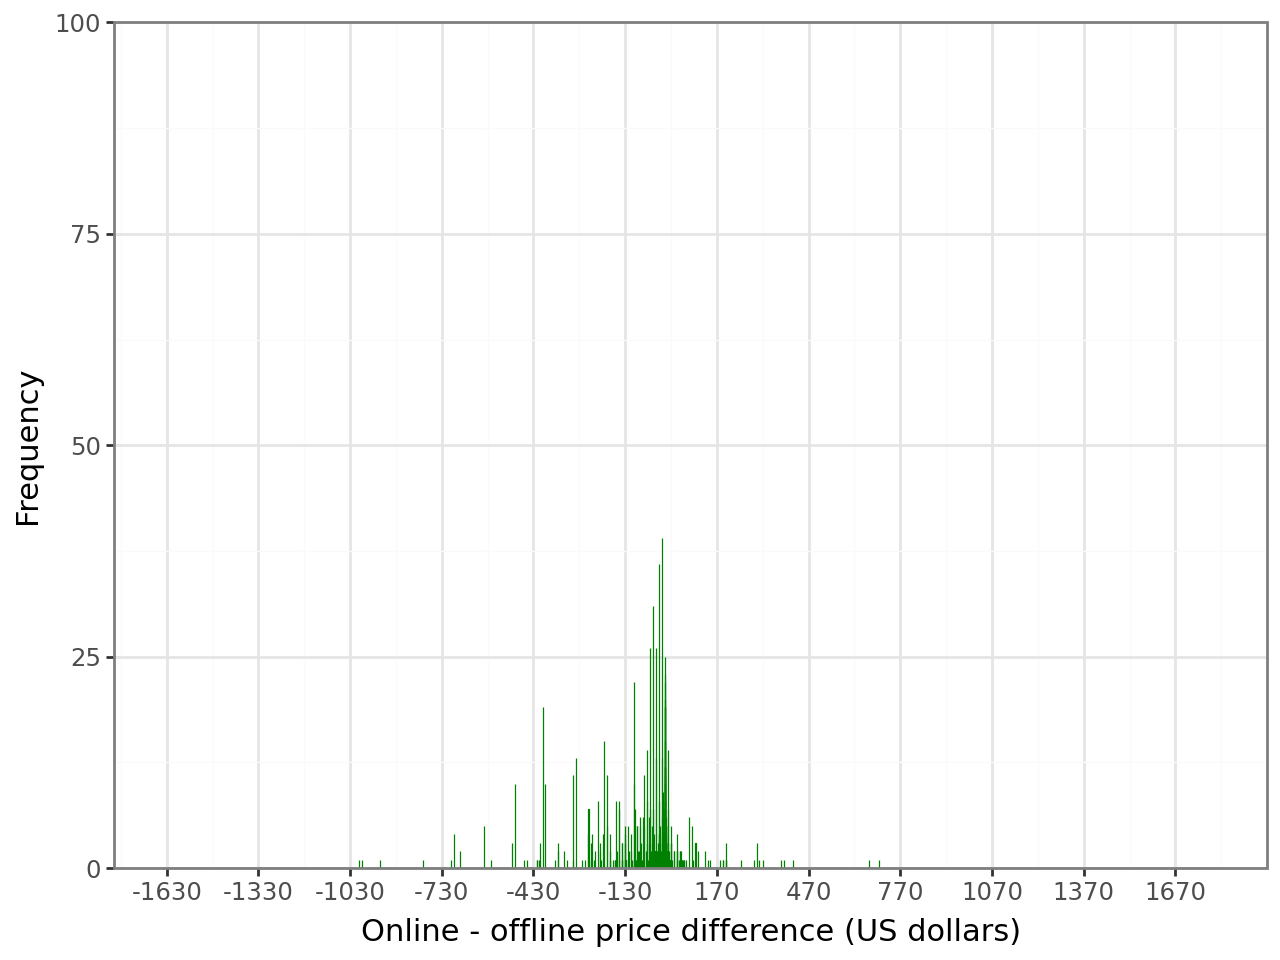

In [93]:
(
    ggplot(data, aes("diff"))
    + geom_histogram(
        binwidth=0.1,
        center=0,
        color="green",
        fill="yellow",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Online - offline price difference (US dollars)", y="Frequency")
    + theme_bw()
    + scale_x_continuous(limits=(price_min, price_max), breaks=np.arange(price_min, price_max, 300))
    + scale_y_continuous(limits=(0,100), expand=(0.00, 0.00))
)


In [19]:
data_0 = data[(data["diff"] >= -0.2) & (data["diff"] <= 0.2)]
data_0.count()

COUNTRY         115
retailer        115
retailer_s      115
date            115
day             115
month           115
year            115
id              115
price           115
price_online    115
imputed          82
DEVICEID        115
TIME            115
ZIPCODE         115
PHOTO           115
OTHERSKUITEM    115
COMMENTS          0
PRICETYPE       115
CODE            115
sale_online       0
country_s       115
diff            115
dtype: int64

## t statistics

In [94]:
# calc mean
mean=-round(data["diff"].mean(),3)
mean

np.float64(38.525)

In [95]:
#calc SE
#SE = (1 / sqrt (n)) * std
std = round(data["diff"].std(), 3)
n = data["diff"].count()
SE = round((1 / np.sqrt(n)) * std,3)
SE

np.float64(2.825)

In [100]:
#calc t test
# How many standard errors your sample mean is away from the value you’re testing (the null hypothesis)

#✅ If the t-statistic is big (far from 0):
#That means your sample mean is very different from what you expected under the null hypothesis — so, you're more likely to reject the null.

#❌ If the t-statistic is small (close to 0):
#That means your sample mean is close to what you expected — so you’re more likely to keep (fail to reject) the null.


# WHEN YOU REJECT THE NULL HYPOSTHESIS, 
# You have enough evidence to say there is an effect (or a difference, or a relationship — depending on what you're testing).

# t calcukatuion:
t = -mean/SE

# critical value for t calculation:
alpha = 0.05
df = l2-1 #degrees of freedom
t_crit = stats.t.ppf(1-alpha/2,df)


if -t_crit <= t <= t_crit:
	print("t stat is in critical points range — do not reject H0")
else:
	print("t stat is outside the critical point range — reject H0")
df, t, t_crit, -t_crit
# here we dont reject the null hyp of 0 diff

t stat is outside the critical point range — reject H0


(2030,
 np.float64(-13.63716814159292),
 np.float64(1.9611332762859217),
 np.float64(-1.9611332762859217))

In [102]:
from scipy import stats

# Calculate the p-value for the mean difference using a one-sample t-test

#If p is small (e.g. < 0.05), it means your observed result is very unlikely under the null hypothesis → we reject H₀.

#If p is large, it means your result could easily happen even if the null is true → we don’t reject H₀.


p_value = stats.ttest_1samp(data["diff"], 0).pvalue
p_value

print(f"There is {p_value *100 :.10f} % chance you’d get a result like this if there was really no difference.")
if p_value <= 0.05:
	print("Unlikely under H₀ — Reject H0")
else:
	print("Could happen under H₀ — Do not reject H0")
p_value

There is 0.0000000000 % chance you’d get a result like this if there was really no difference.
Unlikely under H₀ — Reject H0


np.float64(1.3946715932614923e-40)

## Conf Interval

In [103]:
ci_lower_se = mean - 2 * SE
ci_upper_se = mean + 2 * SE

print(f"Approximate 95% CI using SE*2: [{ci_lower_se:.4f}, {ci_upper_se:.4f}]")

Approximate 95% CI using SE*2: [32.8750, 44.1750]


In [ ]:
# HYPOTHESIS
from scipy import stats

stats.ttest_1samp(data["diff"], 0)


TtestResult(statistic=np.float64(0.4372481266029261), pvalue=np.float64(0.6619460766193054), df=np.int64(6438))

In [ ]:
def t_test_1samp(series, mu=0):
    """
    This is a function to calculate t_test for 1 sample.
    Return: tuple of 2 elements, first is sample mean, second is t test object from scipy
    """
    return (np.mean(series), stats.ttest_1samp(series, mu))


In [ ]:
# MULTIPLE HYPOTHESES
spd = [data.loc[data["retailer"] == x] for x in set(data["retailer"])]
out = [(set(x["retailer"]), t_test_1samp(x["diff"], 0)) for x in spd]

In [ ]:
out


[({44},
  (np.float64(3.73675),
   TtestResult(statistic=np.float64(2.0970967695735117), pvalue=np.float64(0.038102345149389), df=np.int64(119)))),
 ({45},
  (np.float64(-1.2166300366300367),
   TtestResult(statistic=np.float64(-1.2271928388565805), pvalue=np.float64(0.22027995382690432), df=np.int64(545)))),
 ({46},
  (np.float64(-0.4290707648320227),
   TtestResult(statistic=np.float64(-11.641716539786147), pvalue=np.float64(5.8008651517374406e-30), df=np.int64(1398)))),
 ({47},
  (np.float64(0.051625239005736144),
   TtestResult(statistic=np.float64(1.6613855468290473), pvalue=np.float64(0.09723645884012402), df=np.int64(522)))),
 ({48},
  (np.float64(0.42059701492537316),
   TtestResult(statistic=np.float64(2.132197897818741), pvalue=np.float64(0.03390329067089751), df=np.int64(267)))),
 ({49},
  (np.float64(2.410042735042735),
   TtestResult(statistic=np.float64(1.2798236568799926), pvalue=np.float64(0.20187999009028337), df=np.int64(233)))),
 ({50},
  (np.float64(0.60601167315175

In [ ]:
# Create a summary DataFrame from 'out'
import pandas as pd

# Extract relevant info from 'out'
table_out = pd.DataFrame([
	{
		"retailer": list(retailer_set)[0] if len(retailer_set) == 1 else str(retailer_set),
		"estimate": result[0],
		"t_stat": result[1].statistic,
		"p.value": result[1].pvalue
	}
	for retailer_set, result in out
])

# Round the columns as needed
table_out_rounded = table_out.copy()
table_out_rounded["estimate"] = table_out_rounded["estimate"].round(3)
table_out_rounded["p.value"] = table_out_rounded["p.value"].round(4)
table_out_rounded


,retailer,estimate,t_stat,p.value
0,44,3.737,2.097097,0.0381
1,45,-1.217,-1.227193,0.2203
2,46,-0.429,-11.641717,0.0000
3,47,0.052,1.661386,0.0972
4,48,0.421,2.132198,0.0339
5,49,2.410,1.279824,0.2019
6,50,0.606,1.640533,0.1015
7,51,0.284,1.875482,0.0616
8,53,-0.970,-2.730546,0.0073
9,54,-0.028,-0.253362,0.8005


In [ ]:
from scipy.stats import t

# Example: two samples of size 10 → df = 10 + 10 - 2 = 18
df = 18
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit = t.ppf(1 - alpha/2, df)

print(t_crit)


2.10092204024096


# t test another example

## with outlier = 100

In [ ]:
# some groups

a1 = {10, 11, 12, 13, 14, 100}
b1 = {10, 11, 12, 13, 14, 15}

In [ ]:
# finding mean

a1_mean = np.mean(list(a1)) # with outlier
b1_mean = np.mean(list(b1))


a1_list = list(a1) # without outlier
a1_excl_last = a1_list[-5:6]
a1_mean_out = np.mean(a1_excl_last)

a1_mean, b1_mean,a1_mean_out,a1_excl_last

(np.float64(26.666666666666668),
 np.float64(12.5),
 np.float64(12.0),
 [10, 11, 12, 13, 14])

In [ ]:
# calc n-s
ab1n = len(a1)
a1n = len(a1_excl_last)

ab1n,a1n

(6, 5)

In [ ]:
# calc SE 

a1_std = np.std(list(a1))
b1_std = np.std(list(b1))
a1_std_out = np.std(a1_excl_last)

#a1_std,b1_std,a1_std_out

# with outlier
SE_out_1 = np.sqrt((a1_std**2)/ab1n + (b1_std**2)/ab1n)

# without outlier
SE_nout_1 = np.sqrt((a1_std_out**2)/a1n + (b1_std**2)/ab1n)

SE_out_1, SE_nout_1

(np.float64(13.417270517812037), np.float64(0.9413347497628626))

In [ ]:
# Calc t
t_out = (a1_mean - b1_mean) / SE_out_1
t_nout = (a1_mean2 - b1_mean) / SE_nout_1
t_out, t_nout

(np.float64(1.055853099768673), np.float64(17.740766506502602))

In [ ]:
# calc t crit

df_out = 12
df_nout = 11
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit_out = t.ppf(1 - alpha/2, df_out)
t_crit_nout = t.ppf(1 - alpha/2, df_nout)

print(t_crit_out, t_crit_nout)

2.1788128296634177 2.200985160082949


In [ ]:
#calc Confidence Interval 


# For a1 and b1 (with outlier)
ci_lower_out = (a1_mean - b1_mean) - t_crit_out * SE_out
ci_upper_out = (a1_mean - b1_mean) + t_crit_out * SE_out

# For a1_excl_last and b1 (without outlier)
ci_lower_nout = (a1_mean2 - b1_mean) - t_crit_nout * SE_nout
ci_upper_nout = (a1_mean2 - b1_mean) + t_crit_nout * SE_nout

print(f"With outlier: [{ci_lower_out:.2f}, {ci_upper_out:.2f}]")
print(f"Without outlier: [{ci_lower_nout:.2f}, {ci_upper_nout:.2f}]")


With outlier: [-25.95, 54.28]
Without outlier: [-33.01, 66.41]


# t test another example

## with outlier = 200

In [ ]:
# some groups

a2 = {10, 11, 4000, 13, 500, 600}
b2 = {0, 1, 2, 3, 4, 1}

In [ ]:
# finding mean

a2_mean = np.mean(list(a2)) # with outlier
b2_mean = np.mean(list(b2))


a2_list = list(a2)
a2_excl_last = a1_list[-5:6] # without outlier
a2_mean2 = np.mean(a2_excl_last)

a2_mean, b2_mean,a2_mean2,a2_excl_last

(np.float64(855.6666666666666),
 np.float64(2.0),
 np.float64(12.0),
 [10, 11, 12, 13, 14])

In [ ]:
# calc n-s
ab2n = len(a1)
a2n = len(a1_excl_last)

ab2n,a2n

(6, 5)

In [ ]:
# calc SE 

a2_std = np.std(list(a2))
b2_std = np.std(list(b2))
a2_std_out = np.std(a1_excl_last)

#a2_std,b2_std,a2_std_out

# with outlier
SE_out_2 = np.sqrt((a2_std**2)/ab2n + (b2_std**2)/ab2n)

# without outlier
SE_nout_2 = np.sqrt((a2_std_out**2)/a2n + (b2_std**2)/ab2n)

SE_out_2, SE_nout_2

(np.float64(582.5568482830507), np.float64(0.8563488385776754))

In [ ]:
# Calc t

t_out2 = (a2_mean - b2_mean) / SE_out_2
t_nout2 = (a2_mean2 - b2_mean) / SE_nout_2
t_out2, t_nout2

(np.float64(1.4653791628793795), np.float64(11.677484162422843))

In [ ]:
# calc t crit

df_out = 12
df_nout = 11
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit_out = t.ppf(1 - alpha/2, df_out)
t_crit_nout = t.ppf(1 - alpha/2, df_nout)

print(t_crit_out, t_crit_nout)

2.1788128296634177 2.200985160082949


In [ ]:
#calc Confidence Interval 


# For a1 and b1 (with outlier)
ci_lower_out2 = (a2_mean - b2_mean) - t_crit_out * SE_out_2
ci_upper_out2 = (a2_mean - b2_mean) + t_crit_out * SE_out_2

# For a1_excl_last and b1 (without outlier)
ci_lower_nout2 = (a2_mean2 - b2_mean) - t_crit_nout * SE_nout_2
ci_upper_nout2 = (a2_mean2 - b2_mean) + t_crit_nout * SE_nout_2
_
print(f"With outlier: [{ci_lower_out2:.2f}, {ci_upper_out2:.2f}]")
print(f"Without outlier: [{ci_lower_nout2:.2f}, {ci_upper_nout2:.2f}]")


With outlier: [-415.62, 2122.95]
Without outlier: [8.12, 11.88]


In [ ]:
# Re-import required libraries after code execution state reset
import numpy as np
import scipy.stats as stats
import pandas as pd


# Define the two groups as lists (not sets)
a2 = [10, 11, 4000, 13, 500, 600]
b2 = [0, 1, 2, 3, 4, 1]

# Step 1: Calculate means
a2_mean = np.mean(a2)
b2_mean = np.mean(b2)

# Step 2: Calculate standard deviations
a2_std = np.std(a2, ddof=1)
b2_std = np.std(b2, ddof=1)

# Step 3: Calculate sample sizes
n_a2 = len(a2)
n_b2 = len(b2)

# Step 4: Calculate Standard Error of the difference in means
SE = np.sqrt((a2_std**2 / n_a2) + (b2_std**2 / n_b2))

# Step 5: Calculate t-statistic
t_stat = (a2_mean - b2_mean) / SE

# Step 6: Calculate degrees of freedom using Welch-Satterthwaite approximation
df = ( (a2_std**2 / n_a2) + (b2_std**2 / n_b2) )**2 / \
     ( ((a2_std**2 / n_a2)**2) / (n_a2 - 1) + ((b2_std**2 / n_b2)**2) / (n_b2 - 1) )

# Step 7: Calculate p-value (two-sided test)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

# Step 8: Critical t value for 95% confidence
confidence = 0.95
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=df)

# Step 9: Confidence Interval
ci_lower = (a2_mean - b2_mean) - t_crit * SE
ci_upper = (a2_mean - b2_mean) + t_crit * SE



